In [1]:
# Assignment 2: Food-101 Classification using Fine-Tuning based Transfer Learning
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
%tensorflow_version 1.11

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.11`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras import Model, layers
from keras.models import load_model, model_from_json

Using TensorFlow backend.


In [5]:
# unzip food101_4class.zip to train,test and validation folders
!unzip '/content/drive/My Drive/Dublin/food101_4class.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/hamburger/1823305.jpg  
  inflating: train/hamburger/1828545.jpg  
  inflating: train/hamburger/1831555.jpg  
  inflating: train/hamburger/1833096.jpg  
  inflating: train/hamburger/1838179.jpg  
  inflating: train/hamburger/1839233.jpg  
  inflating: train/hamburger/1840084.jpg  
  inflating: train/hamburger/1840786.jpg  
  inflating: train/hamburger/1847289.jpg  
  inflating: train/hamburger/184751.jpg  
  inflating: train/hamburger/1847757.jpg  
  inflating: train/hamburger/184955.jpg  
  inflating: train/hamburger/18518.jpg  
  inflating: train/hamburger/1852483.jpg  
  inflating: train/hamburger/1854382.jpg  
  inflating: train/hamburger/1864131.jpg  
  inflating: train/hamburger/1864786.jpg  
  inflating: train/hamburger/1879189.jpg  
  inflating: train/hamburger/1888361.jpg  
  inflating: train/hamburger/1889072.jpg  
  inflating: train/hamburger/1890101.jpg  
  inflating: train/hamburger/1897946.jpg  
  infla

In [147]:
train_datagen = ImageDataGenerator(zoom_range=0.3, rotation_range=50,
                width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                horizontal_flip=True, fill_mode='nearest')

batch_size = 256 

# load training images
train_generator = train_datagen.flow_from_directory(
        'train',  # load train images
        target_size=(224, 224),  # shrink target size to 224 x 224 
        classes = ['chicken_curry','hamburger','omelette','waffles'],
        class_mode='categorical', 
        batch_size=batch_size)

# load validation images
validation_generator = train_datagen.flow_from_directory(
        'validation',  # This is the source directory for training images
        target_size=(224, 224),  # shrink target size to 224 x 224 
        classes = ['chicken_curry','hamburger','omelette','waffles'], # output classes
        class_mode='categorical', 
        batch_size=batch_size)


Found 4000 images belonging to 4 classes.
Found 2217 images belonging to 4 classes.


In [56]:
# Implementing the Transfer Learning using ResNet50 with Top layer as False

res50_base = ResNet50(
    include_top=False,
    weights='imagenet')

for layer in res50_base.layers:
    layer.trainable = False

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
# Building the Deep Learning layers on top of the ResNet Base 
x = res50_base.output
x = layers.GlobalAveragePooling2D()(x) # applying Average pooling
x = layers.Dense(32, activation='sigmoid')(x) # using 32 neurons with sigmoid as activation layer
predictions = layers.Dense(4, activation='softmax')(x)  
model = Model(res50_base.input, predictions)

In [0]:
# using RMSprop as the optimizer with learning rate with 0.001
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
total_sample=train_generator.n
n_epochs = 10
val_sample = validation_generator.n

In [62]:
history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        validation_data=validation_generator,
        validation_steps=int(val_sample/batch_size),
        shuffle=True,
        verbose=2)

Epoch 1/10
 - 88s - loss: 1.2456 - acc: 0.4796 - val_loss: 1.0681 - val_acc: 0.6230
Epoch 2/10
 - 87s - loss: 0.9599 - acc: 0.6976 - val_loss: 0.9437 - val_acc: 0.6660
Epoch 3/10
 - 86s - loss: 0.8229 - acc: 0.7430 - val_loss: 0.8965 - val_acc: 0.6701
Epoch 4/10
 - 84s - loss: 0.7533 - acc: 0.7652 - val_loss: 0.9226 - val_acc: 0.6221
Epoch 5/10
 - 80s - loss: 0.6922 - acc: 0.7784 - val_loss: 0.7596 - val_acc: 0.7318
Epoch 6/10
 - 74s - loss: 0.6346 - acc: 0.8081 - val_loss: 0.7970 - val_acc: 0.6894
Epoch 7/10
 - 74s - loss: 0.6150 - acc: 0.8029 - val_loss: 0.8094 - val_acc: 0.6792
Epoch 8/10
 - 74s - loss: 0.5744 - acc: 0.8148 - val_loss: 0.7223 - val_acc: 0.7257
Epoch 9/10
 - 73s - loss: 0.5480 - acc: 0.8274 - val_loss: 0.6742 - val_acc: 0.7435
Epoch 10/10
 - 82s - loss: 0.5426 - acc: 0.8133 - val_loss: 0.7386 - val_acc: 0.6982


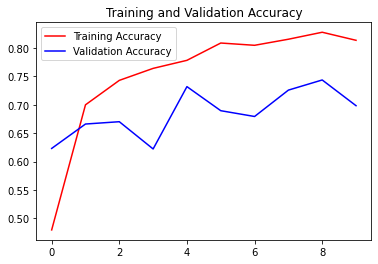

<Figure size 432x288 with 0 Axes>

In [63]:
#Plotting the Accuracy of Training and Validation for base model
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r',label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

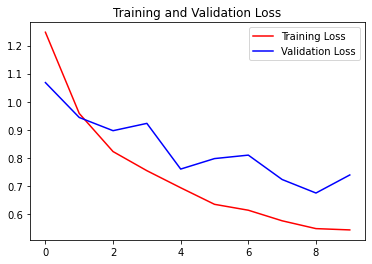

<Figure size 432x288 with 0 Axes>

In [146]:
#Plotting the Accuracy of Training and Validation for base model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.plot(epochs, loss, 'r',label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [111]:
# load test images
test_generator = train_datagen.flow_from_directory(
        'test',  # This is the source directory for test images
        target_size=(224, 224),  # All images will be resized to 224 x 224
        class_mode = None,
        shuffle = False,
        batch_size=304) # keeping batch size as 304

test_generator.reset()

Found 2128 images belonging to 4 classes.


In [112]:
# Predicting the classes of test images
preds = model.predict_generator(test_generator,verbose=1,steps=int(test_generator.n/304)) 

7/7 [==============================] - 34s 5s/step


In [0]:
predicted_classes_idx = preds.argmax(axis=1)

idx_to_cls = {value: key for key, value in train_generator.class_indices.items()}
predicted_classes = np.vectorize(idx_to_cls.get)(predicted_classes_idx)
test_classes = [f.split('/')[0] for f in test_generator.filenames]
filenames_to_cls = list(zip(test_classes, predicted_classes))

In [114]:
# displaying confusion matrix of the prediction
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(test_classes,predicted_classes)
cm

array([[534,   4,   8,   6],
       [145, 345,  16,  28],
       [243,  29, 213,  33],
       [ 85,  12,   5, 422]])

In [115]:
# dislaying precision, recall and the f1-score reports
print(classification_report(test_classes,predicted_classes))

               precision    recall  f1-score   support

chicken_curry       0.53      0.97      0.69       552
    hamburger       0.88      0.65      0.75       534
     omelette       0.88      0.41      0.56       518
      waffles       0.86      0.81      0.83       524

     accuracy                           0.71      2128
    macro avg       0.79      0.71      0.71      2128
 weighted avg       0.79      0.71      0.71      2128



In [116]:
accuracy_score(test_classes,predicted_classes)

0.7114661654135338

In [0]:
model.save('model.h5')

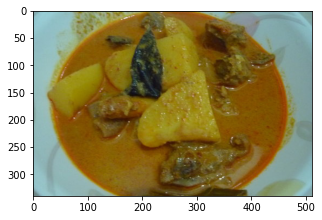

In [137]:
# Testing Random Images of Chicken Curry
import matplotlib.image as mpimg
%matplotlib inline
plt.figure(figsize=(5,4))
image = mpimg.imread('/content/test/chicken_curry/108559.jpg')
plt.imshow(image)

In [144]:
# Testing Random Images of Chicken Curry
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/test/chicken_curry/108559.jpg', target_size = (224,224))

test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image).round()

print(result)

if result[0][0] == 1:
    print("chicken_curry")
elif result[0][1] == 1:
    print("hamburger")
elif result[0][2] == 1:
    print("omelette")
elif result[0][3] == 1:
    print("waffles")

[[1. 0. 0. 0.]]
chicken_curry


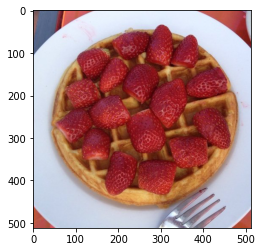

In [141]:
# Displaying Random Images of Waffles
image = mpimg.imread('/content/test/waffles/1143171.jpg')
plt.imshow(image)

In [143]:
# Testing Random Images of Waffles
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/test/waffles/1143171.jpg', target_size = (224,224))

test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image).round()

print(result)

if result[0][0] == 1:
    print("chicken_curry")
elif result[0][1] == 1:
    print("hamburger")
elif result[0][2] == 1:
    print("omelette")
elif result[0][3] == 1:
    print("waffles")

[[0. 0. 0. 1.]]
waffles
